In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf


In [3]:
#importing dataset
df=pd.read_excel('Cocacola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [6]:
df.shape

(42, 2)

# again reading dataset for visualization

In [7]:
df_vis=pd.read_excel('Cocacola_Sales_Rawdata.xlsx',header=0,index_col=0,parse_dates=None,squeeze=True)

In [8]:
df_vis.head()

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Quarter'>

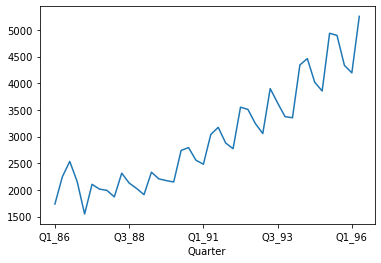

In [9]:
df_vis.plot()

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

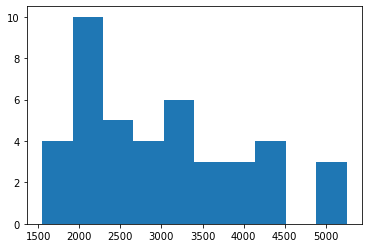

In [10]:
plt.hist(df_vis)

<AxesSubplot:ylabel='Density'>

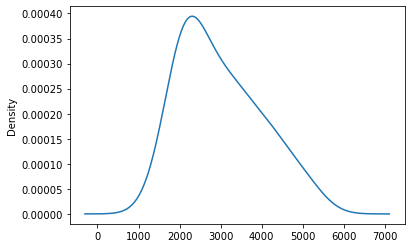

In [12]:
df_vis.plot(kind='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

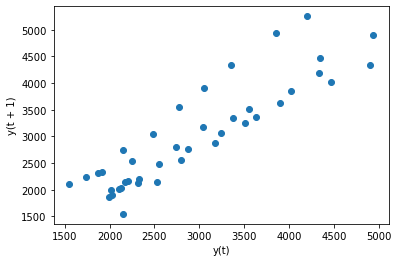

In [14]:
lag_plot(df_vis)

# Model Building

In [18]:
df['Quarters']=0
df['Years']=0
for i in range(42):
    p=df['Quarter'][i]
    df['Quarters'][i]=p[0:2]
    df['Years'][i]=p[3:5]
df.head()    

,Quarter,Sales,Quaters,Years,Quarters
0,Q1_86,1734.827000,0,86,Q1
1,Q2_86,2244.960999,0,86,Q2
2,Q3_86,2533.804993,0,86,Q3
3,Q4_86,2154.962997,0,86,Q4
4,Q1_87,1547.818996,0,87,Q1


In [19]:
quarter_dumies=pd.DataFrame(pd.get_dummies(df.Quarters))
quarter_dumies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [20]:
df=pd.concat([df,quarter_dumies],axis=1)
df.head()

,Quarter,Sales,Quaters,Years,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,0,86,Q1,1,0,0,0
1,Q2_86,2244.960999,0,86,Q2,0,1,0,0
2,Q3_86,2533.804993,0,86,Q3,0,0,1,0
3,Q4_86,2154.962997,0,86,Q4,0,0,0,1
4,Q1_87,1547.818996,0,87,Q1,1,0,0,0


In [21]:
df['t']=range(1,43)
df.head()

,Quarter,Sales,Quaters,Years,Quarters,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,0,86,Q1,1,0,0,0,1
1,Q2_86,2244.960999,0,86,Q2,0,1,0,0,2
2,Q3_86,2533.804993,0,86,Q3,0,0,1,0,3
3,Q4_86,2154.962997,0,86,Q4,0,0,0,1,4
4,Q1_87,1547.818996,0,87,Q1,1,0,0,0,5


In [22]:
df['t_squared']=df.t*df.t
df.head()

,Quarter,Sales,Quaters,Years,Quarters,Q1,Q2,Q3,Q4,t,t_squared
0,Q1_86,1734.827000,0,86,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,0,86,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,0,86,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,0,86,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,0,87,Q1,1,0,0,0,5,25


In [23]:
df['log_Sales']=np.log(df.Sales)
df.head()

,Quarter,Sales,Quaters,Years,Quarters,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,0,86,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,0,86,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,0,86,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,0,86,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,0,87,Q1,1,0,0,0,5,25,7.344602


In [24]:
df.columns

Index(['Quarter', 'Sales', 'Quaters', 'Years', 'Quarters', 'Q1', 'Q2', 'Q3',
       'Q4', 't', 't_squared', 'log_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Quarters', ylabel='Years'>

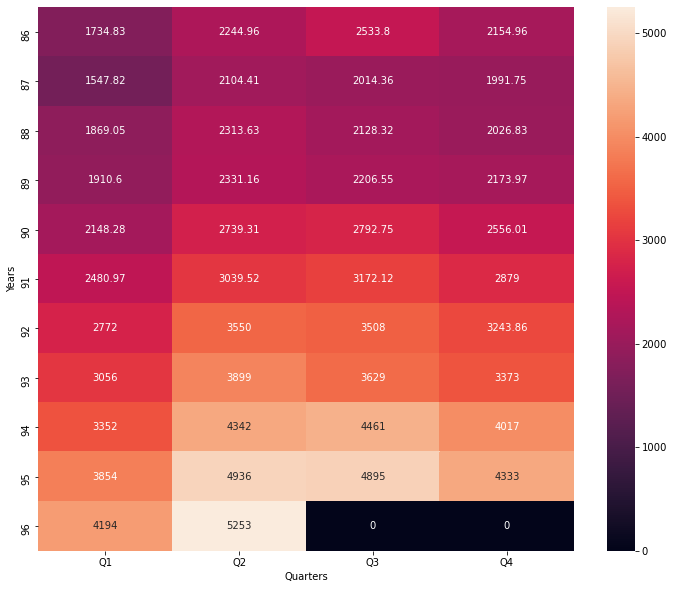

In [26]:
plt.figure(figsize=(12,10))
plot_month_y=pd.pivot_table(data=df,values='Sales',index='Years',columns='Quarters',aggfunc='mean',fill_value=0)
sns.heatmap(plot_month_y,annot=True,fmt='g')

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

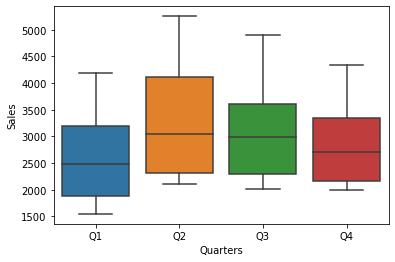

In [27]:
sns.boxplot(x='Quarters',y='Sales',data=df)

<AxesSubplot:xlabel='Years', ylabel='Sales'>

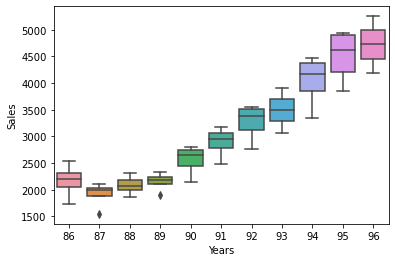

In [29]:
sns.boxplot(x='Years',y='Sales',data=df)

<AxesSubplot:xlabel='Years', ylabel='Sales'>

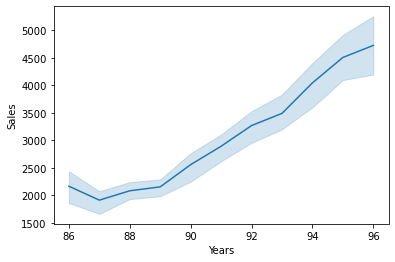

In [30]:
sns.lineplot(x='Years',y='Sales',data=df)

In [31]:
train=df.head(36)
test=df.tail(5)

# Developing linear model

In [32]:
linear_model=smf.ols('Sales~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
pred_linear

37    3988.246755
38    4052.746818
39    4117.246881
40    4181.746944
41    4246.247007
dtype: float64

In [33]:
rmse_linear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

730.4625620161719

# Developing model of exponential

In [34]:
exp_model=smf.ols('log_Sales~t',data=train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
pred_exp

37    8.328579
38    8.351798
39    8.375017
40    8.398236
41    8.421455
dtype: float64

In [36]:
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

570.654284107296

# Developing model of quadratic

In [39]:
quad_model=smf.ols('Sales~t+t_squared',data=train).fit()
pred_quard=pd.Series(quad_model.predict(test[['t','t_squared']]))
pred_quard

37    4546.584007
38    4693.091989
39    4843.700368
40    4998.409142
41    5157.218313
dtype: float64

In [41]:
rmse_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quard))**2))
rmse_quad

471.0572631973043

# Developing the model of additive seasonality

In [42]:
add_sea_model=smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea=pd.Series(add_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))
pred_add_sea

37    2951.555664
38    2938.434220
39    2712.930886
40    2319.061332
41    2951.555664
dtype: float64

In [44]:
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

570.654284107296

# Developing the model of additive seasonality quadratic

In [45]:
add_sea_Quad_model=smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_squad=pd.Series(add_sea_Quad_model.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
pred_add_sea_squad

37    4796.043655
38    4865.862106
39    4723.298666
40    4676.209405
41    5408.231611
dtype: float64

In [47]:
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

570.654284107296

# Developing the model of multiplicative seasonality

In [48]:
mul_sea_model=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mult_sea=pd.Series(mul_sea_model.predict(test))
pred_mult_sea

37    7.958124
38    7.951932
39    7.876511
40    7.716661
41    7.958124
dtype: float64

In [51]:
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_add_sea

2046.8346533236472

# Comparing the above results

In [53]:
data1 = {"MODEL":pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmse_add_sea_quad','rmse_Mult_sea','rmse_Mult_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse = pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

NameError: name 'rmse_add_sea' is not defined